# Question: Given a plot of a story find out which genre it belongs


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import string
import texthero as hero
from wordcloud.wordcloud import WordCloud

In [3]:
movieDetails = pd.read_json('./IMDB_movie_details.json', lines=True)
# print(movieDetails["plot_synopsis"][0])
movieDetails.head()

movie_id                                       plot_summary  duration  \
0  tt0105112  Former CIA analyst, Jack Ryan is in England wi...  1h 57min   
1  tt1204975  Billy (Michael Douglas), Paddy (Robert De Niro...  1h 45min   
2  tt0243655  The setting is Camp Firewood, the year 1981. I...  1h 37min   
3  tt0040897  Fred C. Dobbs and Bob Curtin, both down on the...   2h 6min   
4  tt0126886  Tracy Flick is running unopposed for this year...  1h 43min   

                         genre  rating release_date  \
0           [Action, Thriller]     6.9   1992-06-05   
1                     [Comedy]     6.6   2013-11-01   
2            [Comedy, Romance]     6.7   2002-04-11   
3  [Adventure, Drama, Western]     8.3   1948-01-24   
4     [Comedy, Drama, Romance]     7.3   1999-05-07   

                                       plot_synopsis  
0  Jack Ryan (Ford) is on a "working vacation" in...  
1  Four boys around the age of 10 are friends in ...  
2                                                     
3  Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...  
4  Jim McAllister (Matthew Broderick) is a much-a...

In [4]:
# movieReviews = pd.read_json('./IMDB_reviews.json', lines=True)
# movieReviews.head()

In [5]:
print("Movie shape: ",movieDetails.shape)
print("Null values: ",movieDetails.isnull().values.any())

# movieDetails[movieDetails["plot_synopsis"].notna()]
movieDetails["plot_synopsis"].notna().unique()
print(type(movieDetails["plot_synopsis"][2]))

Movie shape:  (1572, 7)
Null values:  False
<class 'str'>


# visualizing the dataset

In [6]:
import gensim

# %%time
# Build the bigram and trigram models
bigram = gensim.models.Phrases(movieDetails["plot_synopsis"], min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

print("bigram: ",bigram)
# print("trigram: ",trigram)



# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)

print(bigram_mod)

bigram:  Phrases<4135 vocab, min_count=5, threshold=100, max_vocab_size=40000000>


### visual 1 -> counts per rating

Text(0.5, 1.0, 'Counts per rating')

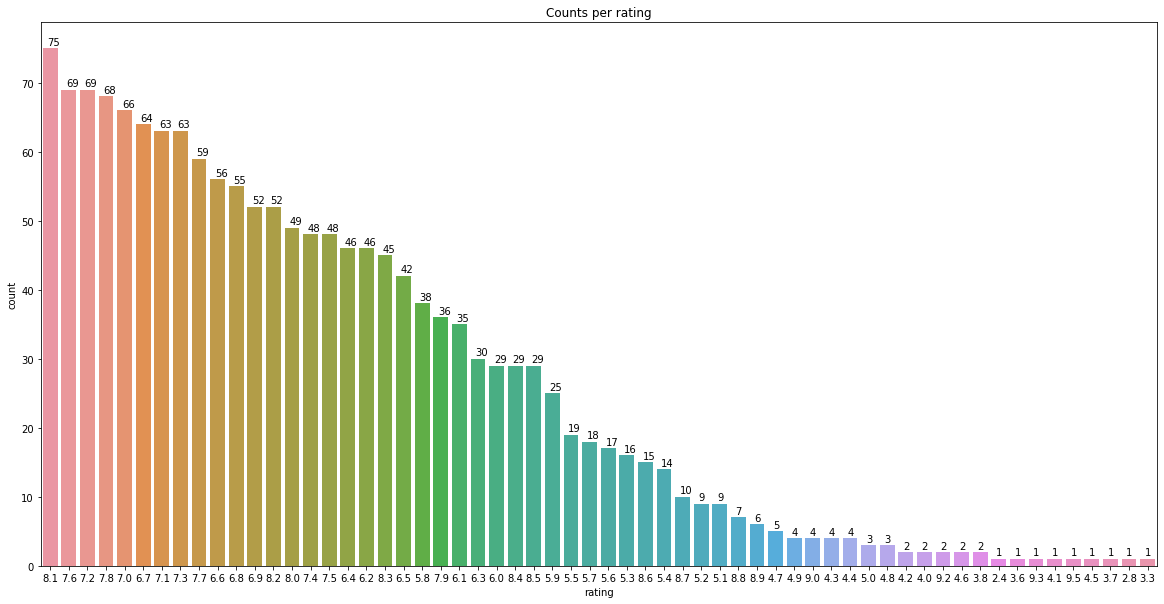

In [7]:
plt.figure(figsize=(20,10))

ax = sns.countplot(x=movieDetails["rating"],  data=movieDetails, order = movieDetails["rating"].value_counts().index )
for p, label in zip(ax.patches, movieDetails["rating"].value_counts()):
#     print(p)
#     print(label)
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))
ax.set_title('Counts per rating')

In [8]:
#below shows us each movie is only mentioned once
movieDetails.groupby("movie_id").count().describe()


plot_summary  duration   genre  rating  release_date  plot_synopsis
count        1572.0    1572.0  1572.0  1572.0        1572.0         1572.0
mean            1.0       1.0     1.0     1.0           1.0            1.0
std             0.0       0.0     0.0     0.0           0.0            0.0
min             1.0       1.0     1.0     1.0           1.0            1.0
25%             1.0       1.0     1.0     1.0           1.0            1.0
50%             1.0       1.0     1.0     1.0           1.0            1.0
75%             1.0       1.0     1.0     1.0           1.0            1.0
max             1.0       1.0     1.0     1.0           1.0            1.0

[Action, Adventure, Sci-Fi]    68
[Comedy, Drama, Romance]       58
[Drama, Romance]               50
[Comedy]                       49
[Drama]                        49
                               ..
[Comedy, Drama, Sport]          1
[Adventure, Sci-Fi]             1
[Drama, Fantasy, Mystery]       1
[Biography, Drama, Family]      1
[Action, Comedy, Thriller]      1
Name: genre, Length: 237, dtype: int64


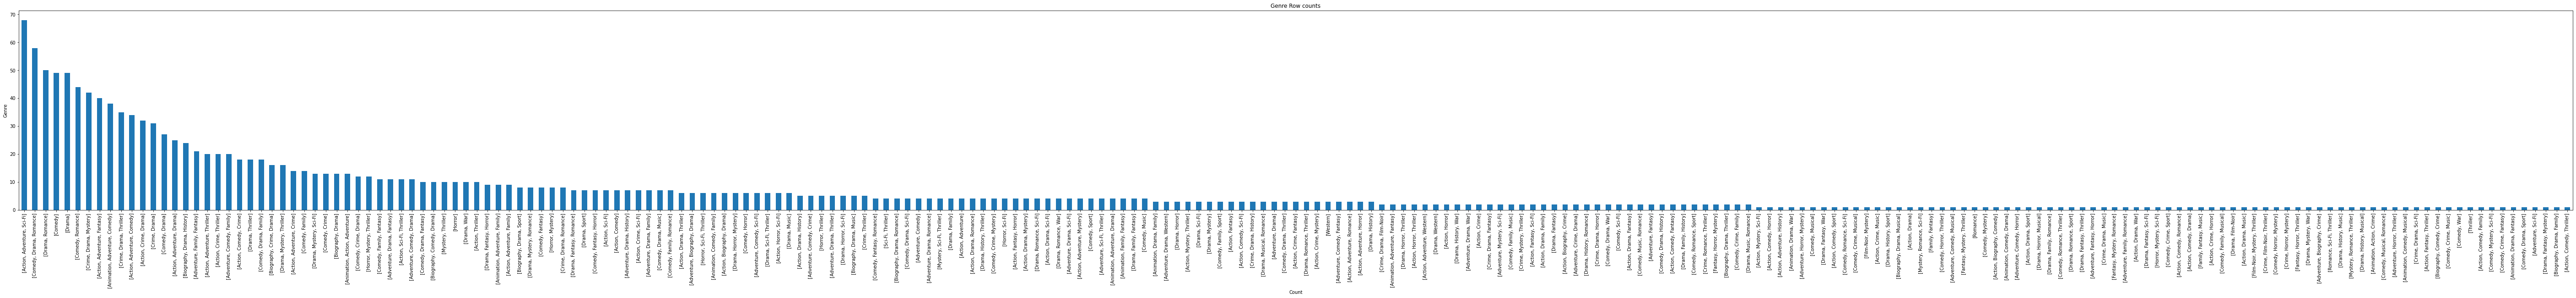

In [9]:
print(movieDetails["genre"].value_counts())
movieDetails["genre"].value_counts().plot(kind="bar",figsize=(100,8))
plt.title("Genre Row counts")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [10]:
# genres=[]
# for i in movieDetails["genre"]:
#     for j in i:
#         genres.append(j)

In [11]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [12]:
def make_bigrams(texts): #from course notes
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):#from course notes
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def remove_Stopwords(text ):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)
    
#lemmatization and tokenization
def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

#for removing punctuations
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### cleaning the plot_synopsis column

In [14]:
movieDetails["plot_synopsis"] = movieDetails["plot_synopsis"].apply(clean_text)
movieDetails["plot_synopsis"] = movieDetails["plot_synopsis"].apply(remove_Stopwords)
movieDetails["plot_synopsis"] = movieDetails["plot_synopsis"].apply(lemmatize_text)
movieDetails["plot_synopsis"]

0       jack ryan ford working vacation london family ...
1       four boy around age 10 friend brooklyn 50 nick...
2                                                        
3       fred dobbs humphrey bogart bob curtin tim holt...
4       jim mcallister matthew broderick muchadmired h...
                              ...                        
1567    year 1998 evan treborn ashton kutcher suffered...
1568    brandon michael fassbender successful handsome...
1569    film alternate three different period time inv...
1570                                                     
1571                                                     
Name: plot_synopsis, Length: 1572, dtype: object

### cleaning the plot_summary column

In [15]:
movieDetails["plot_summary"] = movieDetails["plot_summary"].apply(clean_text)
movieDetails["plot_summary"] = movieDetails["plot_summary"].apply(remove_Stopwords)
movieDetails["plot_summary"] = movieDetails["plot_summary"].apply(lemmatize_text)
movieDetails["plot_summary"][0]

'former cia analyst jack ryan england family vacation suddenly witness explosion outside buckingham palace revealed people trying abduct member royal family jack intervenes killing one capturing stop plan track afterwards learns theyre irish revolutionary two men brother court hearing one thats still alive vow get back jack sentenced seems end however whilst man transported broken jack learns doesnt think there anything worry naval academy someone try kill learns also going family rush find safe also victim failed assassination thats jack decides rejoin cia try find man make another attempt written rcs0411yahoocom'

count    1572.000000
mean      781.980916
std       800.601270
min         0.000000
25%       273.750000
50%       590.500000
75%      1036.000000
max      6113.000000
Name: num_words, dtype: float64


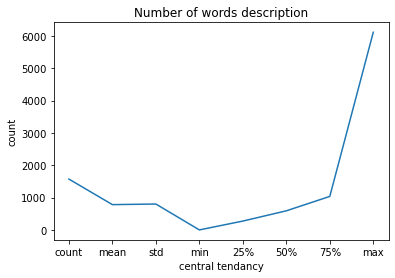

In [16]:
movieDetails['num_words'] = movieDetails['plot_synopsis'].apply(lambda x:len(str(x).split())) 

desc = movieDetails['num_words'].describe()
print(desc)
plt.plot(desc)
plt.title("Number of words description")
plt.xlabel("central tendancy")
plt.ylabel("count")
plt.show()

In [17]:
# print(movieDetails['rating'].median())
# median = movieDetails['rating'].median()

In [18]:
# lower_ratings = movieDetails[movieDetails['rating'] < median]
# higher_ratings = movieDetails[movieDetails['rating'] > median]
# lower_ratings

### Most used words within the plot_summary column

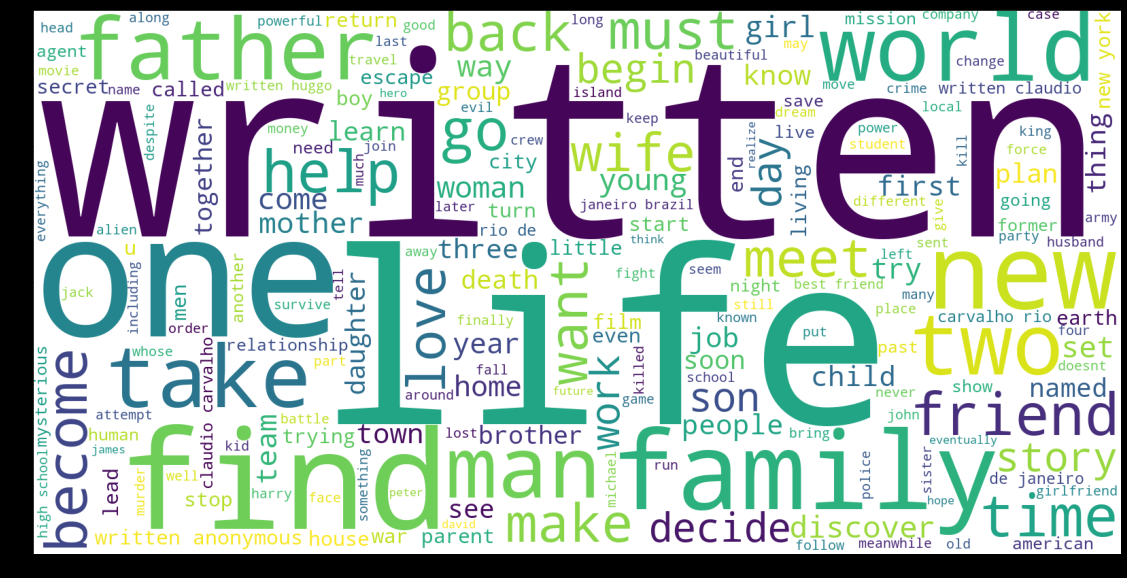

In [19]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(movieDetails['plot_summary'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [20]:
# the plot summary seemed to have more noun words as compared to the plot synopsis

## experimentation begins

In [21]:
# !pip install scikit-multilearn

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer #used for multi label classification
from sklearn.model_selection import train_test_split

#machine learning algorithms
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import MultinomialNB

#accuracy scores
from sklearn.metrics import accuracy_score,hamming_loss,classification_report

#we use the below because we will be using the logistic regression and multilabel binarizer
from sklearn.multiclass import OneVsRestClassifier # will do a classification of one class vs another(multiclass/multi label strategy)

In [23]:
movieDetails.head()
# print("genre type: ",type(movieDetails["genre"][0][0]))

movie_id                                       plot_summary  duration  \
0  tt0105112  former cia analyst jack ryan england family va...  1h 57min   
1  tt1204975  billy michael douglas paddy robert de niro arc...  1h 45min   
2  tt0243655  setting camp firewood year 1981 last day every...  1h 37min   
3  tt0040897  fred c dobbs bob curtin luck tampico mexico 19...   2h 6min   
4  tt0126886  tracy flick running unopposed year high school...  1h 43min   

                         genre  rating release_date  \
0           [Action, Thriller]     6.9   1992-06-05   
1                     [Comedy]     6.6   2013-11-01   
2            [Comedy, Romance]     6.7   2002-04-11   
3  [Adventure, Drama, Western]     8.3   1948-01-24   
4     [Comedy, Drama, Romance]     7.3   1999-05-07   

                                       plot_synopsis  num_words  
0  jack ryan ford working vacation london family ...        850  
1  four boy around age 10 friend brooklyn 50 nick...        521  
2                                                             0  
3  fred dobbs humphrey bogart bob curtin tim holt...        271  
4  jim mcallister matthew broderick muchadmired h...        891

## one hot encoding the targets

In [24]:
multilabel = MultiLabelBinarizer() #need to create a multilabelbinarizer object.

In [25]:
y = multilabel.fit_transform(movieDetails["genre"])
# pd.DataFrame(y)
print("Document Term matrix of the genres")
pd.DataFrame(y,columns=multilabel.classes_) #multilabel classifiers expect such

Document Term matrix of the genres


Action  Adventure  Animation  Biography  Comedy  Crime  Drama  Family  \
0          1          0          0          0       0      0      0       0   
1          0          0          0          0       1      0      0       0   
2          0          0          0          0       1      0      0       0   
3          0          1          0          0       0      0      1       0   
4          0          0          0          0       1      0      1       0   
...      ...        ...        ...        ...     ...    ...    ...     ...   
1567       0          0          0          0       0      0      0       0   
1568       0          0          0          0       0      0      1       0   
1569       1          0          0          0       0      0      1       0   
1570       0          0          0          0       1      0      1       0   
1571       0          0          0          0       0      0      1       0   

      Fantasy  Film-Noir  ...  Horror  Music  Musical  Mystery  Romance  \
0           0          0  ...       0      0        0        0        0   
1           0          0  ...       0      0        0        0        0   
2           0          0  ...       0      0        0        0        1   
3           0          0  ...       0      0        0        0        0   
4           0          0  ...       0      0        0        0        1   
...       ...        ...  ...     ...    ...      ...      ...      ...   
1567        0          0  ...       0      0        0        0        0   
1568        0          0  ...       0      0        0        0        0   
1569        0          0  ...       0      0        0        0        0   
1570        0          0  ...       0      0        0        0        0   
1571        0          0  ...       0      0        0        0        0   

      Sci-Fi  Sport  Thriller  War  Western  
0          0      0         1    0        0  
1          0      0         0    0        0  
2          0      0         0    0        0  
3          0      0         0    0        1  
4          0      0         0    0        0  
...      ...    ...       ...  ...      ...  
1567       1      0         1    0        0  
1568       0      0         0    0        0  
1569       0      0         0    0        0  
1570       0      0         0    0        0  
1571       0      0         1    0        0  

[1572 rows x 21 columns]

In [26]:
# colors = cm.rainbow(np.linspace(0, 1, 21))
# colors

['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'Film-Noir' 'History' 'Horror' 'Music' 'Musical'
 'Mystery' 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'War' 'Western']
[438 433  84 101 525 302 799 155 178   6  58 116  34  12 161 237 188  30
 233  25  10]


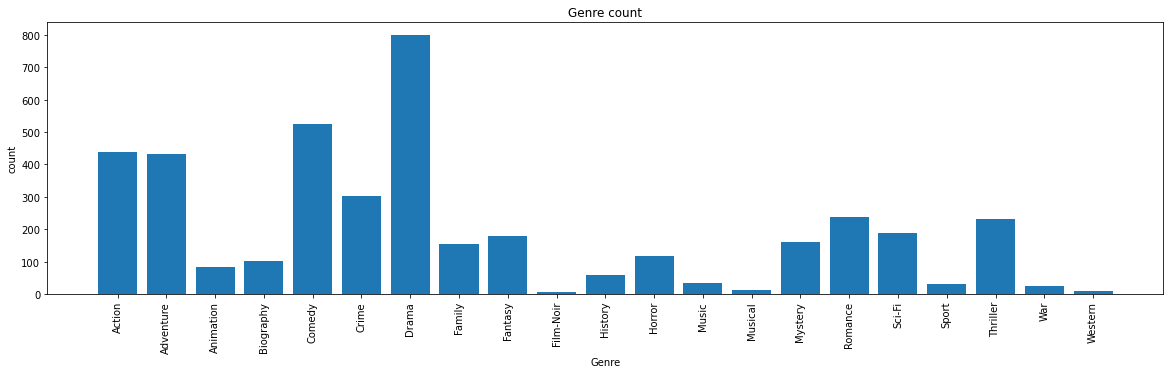

In [27]:
sum_column = y.sum(axis=0)
print(multilabel.classes_)
print (sum_column)
plt.figure(figsize=(20,5))
plt.bar(multilabel.classes_,sum_column)
plt.xticks(rotation=90)
plt.title("Genre count")
plt.xlabel("Genre")
plt.ylabel("count")
plt.show()


In [28]:
print("No of classes: {} i.e {} ".format(len(multilabel.classes_), multilabel.classes_))

No of classes: 21 i.e ['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'Film-Noir' 'History' 'Horror' 'Music' 'Musical'
 'Mystery' 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'War' 'Western'] 


# TFIDF

statistical measure that evaluates how relevant a word is to a document 

## plot summary TFIDF

In [29]:
# TfidfVectorizer -> term frequency multiplication with inverse document frequency
tfidf = TfidfVectorizer(analyzer="word",max_features=5000, ngram_range=(1,1), stop_words="english")#if word is selected, tokenization will be done word by word, if char is selected ....
sum_tfidf = tfidf.fit_transform(movieDetails["plot_summary"]).toarray()
# print("plot_summary TFIDF")
# pd.DataFrame(sum_tfidf)

## plot synopsis TFIDF

In [30]:
# TfidfVectorizer -> term frequency multiplication with inverse document frequency
tfidf = TfidfVectorizer(analyzer="word",max_features=5000, ngram_range=(1,1), stop_words="english")#if word is selected, tokenization will be done word by word, if char is selected ....
syn_tfidf = tfidf.fit_transform(movieDetails["plot_synopsis"]).toarray()
# print("plot_synopsis TFIDF")
# pd.DataFrame(syn_tfidf)

### Creating PCA column

This is for visualizing the plot summary

In [31]:
#principal component analysis
movieDetails["summary_pca"] = (movieDetails["plot_summary"].pipe(hero.clean).pipe(hero.tfidf).pipe(hero.pca))
# syn_tfidf = (movieDetails["plot_synopsis"].pipe(hero.clean).pipe(hero.tfidf))#takes too long
movieDetails

movie_id                                       plot_summary  duration  \
0      tt0105112  former cia analyst jack ryan england family va...  1h 57min   
1      tt1204975  billy michael douglas paddy robert de niro arc...  1h 45min   
2      tt0243655  setting camp firewood year 1981 last day every...  1h 37min   
3      tt0040897  fred c dobbs bob curtin luck tampico mexico 19...   2h 6min   
4      tt0126886  tracy flick running unopposed year high school...  1h 43min   
...          ...                                                ...       ...   
1567   tt0289879  evan treborn grows small town single working m...  1h 53min   
1568   tt1723811  brandon 30something man living new york unable...  1h 41min   
1569   tt5013056  evacuation allied soldier british empire franc...  1h 46min   
1570  tt0104014/  beautiful 24yearold diana bruni who happily ma...  1h 33min   
1571  tt0114142/  marriage david burgess senior executive beauti...  1h 32min   

                            genre  rating release_date  \
0              [Action, Thriller]     6.9   1992-06-05   
1                        [Comedy]     6.6   2013-11-01   
2               [Comedy, Romance]     6.7   2002-04-11   
3     [Adventure, Drama, Western]     8.3   1948-01-24   
4        [Comedy, Drama, Romance]     7.3   1999-05-07   
...                           ...     ...          ...   
1567           [Sci-Fi, Thriller]     7.7   2004-01-23   
1568                      [Drama]     7.2   2012-01-13   
1569     [Action, Drama, History]     8.1   2017-07-21   
1570              [Comedy, Drama]     5.3   1992-02-21   
1571            [Drama, Thriller]     4.0   1999-01-29   

                                          plot_synopsis  num_words  \
0     jack ryan ford working vacation london family ...        850   
1     four boy around age 10 friend brooklyn 50 nick...        521   
2                                                                0   
3     fred dobbs humphrey bogart bob curtin tim holt...        271   
4     jim mcallister matthew broderick muchadmired h...        891   
...                                                 ...        ...   
1567  year 1998 evan treborn ashton kutcher suffered...        198   
1568  brandon michael fassbender successful handsome...        526   
1569  film alternate three different period time inv...        744   
1570                                                             0   
1571                                                             0   

                                        summary_pca  
0     [-0.03327146127828571, -0.008339487294943658]  
1      [-0.036597472620131896, 0.02882091170322654]  
2      [0.005022904489398553, -0.06390560885135212]  
3       [0.021133144269219122, 0.04471752380412957]  
4      [-0.05316450710775607, 0.024703442422092638]  
...                                             ...  
1567  [-0.10576224577991268, -0.024141408302503154]  
1568   [-0.04249959555514495, -0.11081414312267455]  
1569    [0.10788385795910233, -0.01362388717669038]  
1570  [-0.04669035690209024, -0.031691280531681555]  
1571   [-0.019699442956015282, 0.03917827610878805]  

[1572 rows x 9 columns]

In [32]:
hero.scatterplot(movieDetails,"summary_pca",title="PCA plot")#add color="genre"#needs to be one dimension

## select value of X 

since the dataset has plot_synopsis and plot_summary. The below tab allows you to switch between the two.  -> used summary for time purposes

In [33]:
x = sum_tfidf 
# x = syn_tfidf
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
print(x.shape, y.shape)

(1572, 5000) (1572, 21)


## splitting test and train data

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)#X is feature, y is target,stratify will make sure we divide an equal ratio in train and test data sample

## plotting the Train and Test dataset labels

['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'Film-Noir' 'History' 'Horror' 'Music' 'Musical'
 'Mystery' 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'War' 'Western']
[357 339  65  78 421 243 643 130 150   3  44  86  29  10 128 201 142  25
 182  20   5]


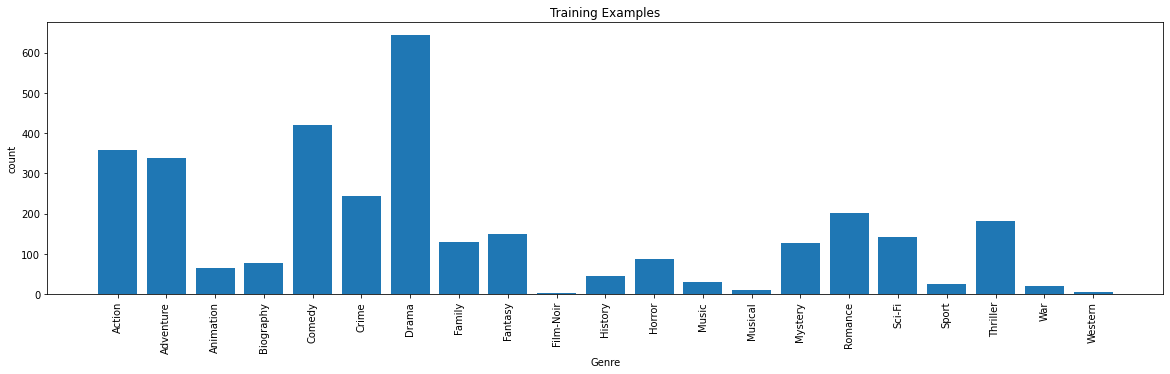

In [36]:
# pd.DataFrame(y_test,columns=multilabel.classes_)
sum_column = y_train.sum(axis=0)
print(multilabel.classes_)
print (sum_column)
plt.figure(figsize=(20,5))
plt.bar(multilabel.classes_,sum_column)
plt.xticks(rotation=90)
plt.title("Training Examples")
plt.xlabel("Genre")
plt.ylabel("count")
plt.show()

['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'Film-Noir' 'History' 'Horror' 'Music' 'Musical'
 'Mystery' 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'War' 'Western']
[ 81  94  19  23 104  59 156  25  28   3  14  30   5   2  33  36  46   5
  51   5   5]


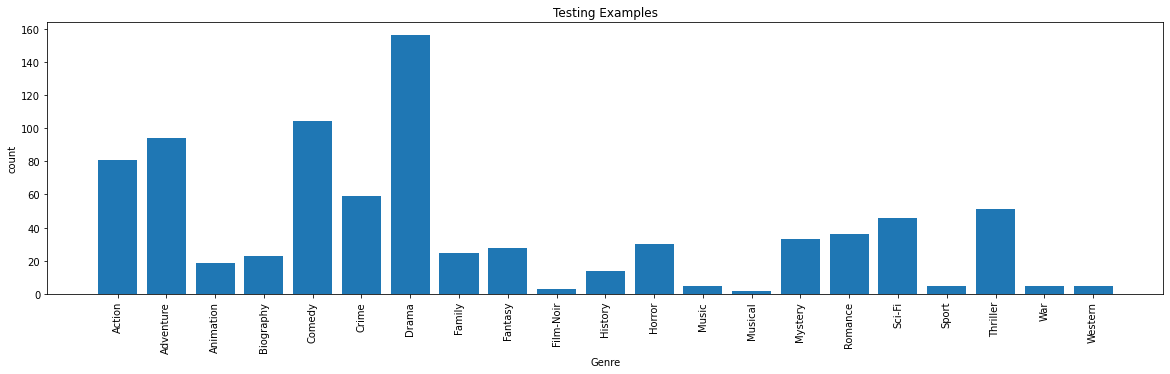

In [37]:
sum_column = y_test.sum(axis=0)
print(multilabel.classes_)
print (sum_column)
plt.figure(figsize=(20,5))
plt.bar(multilabel.classes_,sum_column)
plt.xticks(rotation=90)
plt.title("Testing Examples")
plt.xlabel("Genre")
plt.ylabel("count")
plt.show()

### confusion matrix declaration

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
def confusionmatrix(y_test,y_pred,model_name,color="Blues"):
    mat = confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))
    sns.heatmap(mat,annot=True, cmap=color)
    plt.title(model_name)
    plt.xlabel("True Label")
    plt.ylabel("predicted label")
    #plt.savefig("confmat.png")
    plt.show()
    return
    

## Accuracy functions


In [40]:
def j_score(y_true,y_pred): #to help us know how the model is performing
    jaccard = np.minimum(y_true,y_pred).sum(axis=1)/np.maximum(y_true,y_pred).sum(axis=1)
    return jaccard.mean()*100

def ham_loss(y_true,y_pred): #need to find the name(not working for some reason)
    hamn_loss = hamming_loss(y_true,y_pred)
    return hamn_loss

def a_score(y_true,y_pred): #need to find the name(not working for some reason)
    default_accuracy = accuracy_score(y_true,y_pred)
    return default_accuracy*100

def print_score(y_pred,clf):
    print("*"*50)
    print("model: ** {} **".format(clf.__class__.__name__))
    print("")    
    print("Jaccard Score: {}".format(j_score(y_test,y_pred)))
    print("Hamming Loss: {}".format(ham_loss(y_test,y_pred))) #the smaller the better

## Modeling and Evaluation

here we train and test the models. Accuracy is measured using the jaccard score, hamming loss, and scikitlearns score method(for both train and test) 

In [41]:
sgd = SGDClassifier()#stochastic gradient descent algorithm
lr = LogisticRegression(solver="lbfgs") #the lbfgs is the algorithm to use in the optimization problem(for multiclass problems)
svc = LinearSVC()
mNB = BinaryRelevance(MultinomialNB()) #we wrap the model into an sklearn multilabel class estimator

**************************************************
model: ** SGDClassifier **

Jaccard Score: 35.43386243386244
Hamming Loss: 0.10445956160241875
Train accuracy score : 99.92044550517105
Test accuracy score: 9.523809523809524


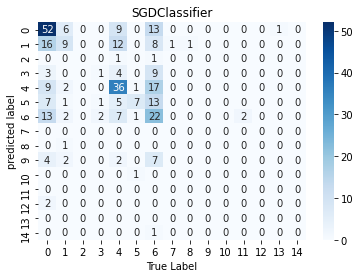

**************************************************
model: ** LogisticRegression **

Jaccard Score: 20.84656084656085
Hamming Loss: 0.1108087679516251
Train accuracy score : 7.478122513922036
Test accuracy score: 4.444444444444445


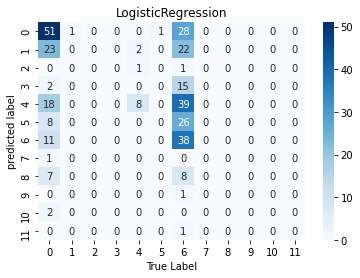

**************************************************
model: ** LinearSVC **

Jaccard Score: 33.01587301587301
Hamming Loss: 0.10234315948601663
Train accuracy score : 99.76133651551312
Test accuracy score: 7.936507936507936


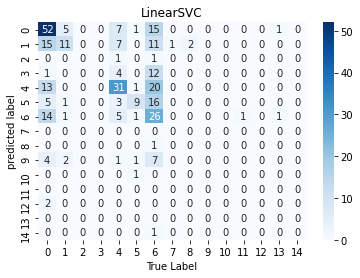

**************************************************
model: ** MultinomialNB **

Jaccard Score: 20.555555555555554
Hamming Loss: 0.10975056689342404
Train accuracy score : 7.080350039777247
Test accuracy score: 3.492063492063492


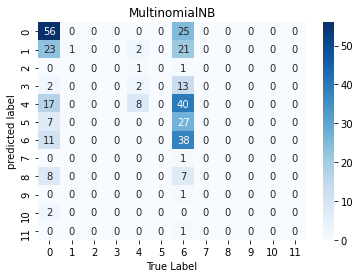

In [42]:
for classifier in [sgd,lr,svc,mNB.classifier]:
    clf = OneVsRestClassifier(classifier) #out of the 20 classes it will select 1 at a time and the other 19 as all other classes and will do the same for every data 
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print_score(y_pred,classifier)
    print("Train accuracy score :",clf.score(x_train,y_train)*100)
    print("Test accuracy score: {}".format(a_score(y_test,y_pred)))
    confusionmatrix(y_test,y_pred,classifier.__class__.__name__)
    

## Best Model

The SGDClassifier showed to have the best accuracy on most of the metrics used

In [43]:
clf = OneVsRestClassifier(sgd)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print_score(y_pred,sgd)
print("Train accuracy score :",clf.score(x_train,y_train)*100)
print("Test accuracy score: {}".format(a_score(y_test,y_pred)))

**************************************************
model: ** SGDClassifier **

Jaccard Score: 36.46560846560846
Hamming Loss: 0.10627362055933484
Train accuracy score : 99.52267303102626
Test accuracy score: 9.206349206349207


# Confusion Matrix

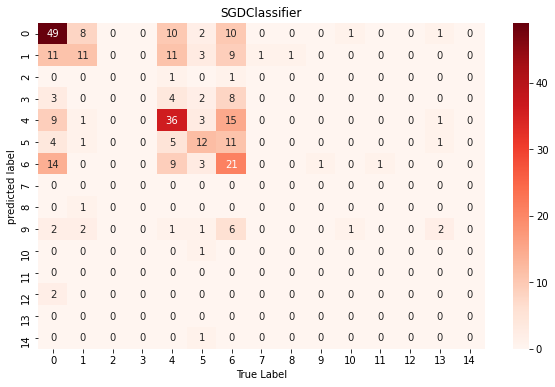

In [44]:
plt.figure(figsize=(10,6))
confusionmatrix(y_test,y_pred,sgd.__class__.__name__, "Reds")

## Classification Evaluation

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test,y_pred,target_names=multilabel.classes_))

              precision    recall  f1-score   support

      Action       0.63      0.56      0.59        81
   Adventure       0.85      0.53      0.65        94
   Animation       0.00      0.00      0.00        19
   Biography       0.00      0.00      0.00        23
      Comedy       0.60      0.51      0.55       104
       Crime       0.53      0.49      0.51        59
       Drama       0.64      0.68      0.66       156
      Family       0.67      0.08      0.14        25
     Fantasy       0.64      0.25      0.36        28
   Film-Noir       0.00      0.00      0.00         3
     History       0.00      0.00      0.00        14
      Horror       0.17      0.03      0.06        30
       Music       0.00      0.00      0.00         5
     Musical       0.00      0.00      0.00         2
     Mystery       0.42      0.24      0.31        33
     Romance       0.58      0.50      0.54        36
      Sci-Fi       0.83      0.11      0.19        46
       Sport       0.00    

/home/egichuki/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/egichuki/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



## save the model to disk

In [47]:
import pickle

In [48]:
#9.2%
filename = 'best_model.model'
pickle.dump(clf, open(filename, 'wb'))

# Testing 

### load the model from disk

In [49]:
best_model = pickle.load(open(filename, 'rb'))

In [50]:
result = best_model.score(x_test, y_test)
print("Model Accuracy: {:.2f}%".format(result*100))

Model Accuracy: 9.21%


In [51]:
#incase API doesnt work
# movie_plot = ["'Elite' presents three young people who have received a scholarship to study in Las Encinas, the most prestigious institute in Spain, after the collapse suffered by the public center in which they studied. However, their arrival in Las Encinas will not be easy, and the students, belonging to the upper class, will not welcome the arrival of Samuel, Nadia and Christian, who will turn upside down, without them wanting it, life of their schoolmates."]

In [52]:
from requests.auth import HTTPBasicAuth
import requests
import json

In [53]:
api_key = "112c829d"

## Enter movie title

In [54]:
movie_title = "elite"

In [55]:
# https://www.omdbapi.com/?apikey=112c829d&t=elite
url = f"https://www.omdbapi.com/?apikey={api_key}&t={movie_title}"
headers = {"Accept": "application/json"}
req = requests.get(url, headers=headers)
movie = json.loads(req.content.decode('utf-8'))

In [56]:
movie_plot = movie['Plot']
movie_plot

'When three working-class teenagers begin attending an exclusive private school in Spain, the clash between them and the wealthy students leads to murder.'

In [57]:
expected_output = movie["Genre"]
expected_output

'Crime, Drama, Thriller'

### preprocessing

In [62]:
tfidf = TfidfVectorizer(analyzer="word",max_features=5000, ngram_range=(1,1), stop_words="english")#if word is selected, tokenization will be done word by word, if char is selected ....

In [64]:
xt = tfidf.transform("'Elite' presents three young people who have received a scholarship to study in Las Encinas, the most prestigious institute in Spain, after the collapse suffered by the public center in which they studied. However, their arrival in Las Encinas will not be easy, and the students, belonging to the upper class, will not welcome the arrival of Samuel, Nadia and Christian, who will turn upside down, without them wanting it, life of their schoolmates.")
# xt
# pd.DataFrame(xt)

NotFittedError: The TF-IDF vectorizer is not fitted

## predicted output

In [ ]:
#predicting from the stored model

arr = best_model.predict(xt)
pd.DataFrame(arr,columns=multilabel.classes_)
multilabel.inverse_transform(arr)

In [ ]:
#predicting from the volatile model

arr = clf.predict(xt)
pd.DataFrame(arr,columns=multilabel.classes_)
multilabel.inverse_transform(clf.predict(xt))